In [1]:
import pandas as pd
df_India = pd.read_csv("India_tweets.csv")

In [2]:
df_India.head()

,country,date,clean_texts,label
0,India,2020-03-01,landed mumbai midnight absolutely no thermal s...,0
1,India,2020-03-01,keeps india alive sundaymotivation covid,1
2,India,2020-03-01,not single patient suspected covid maharashtra...,1
3,India,2020-03-01,becoming increasingly serious globally covid,0
4,India,2020-03-01,people killed corona virus india people killed...,0


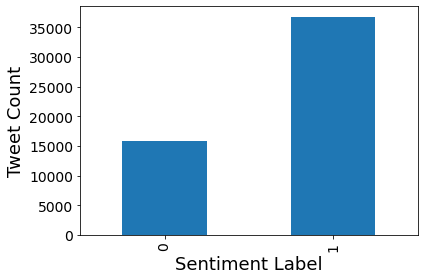

In [5]:
import matplotlib.pyplot as plt
df_India['label'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()
# df_new.plot(x="comp_score", y="", kind="bar", ax=ax, color="maroon")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(1,2),min_df=5, max_df=0.9, stop_words='english')
vector.fit(df_India['clean_texts'])
vect_X = vector.fit_transform(df_India['clean_texts'])
vect_X.shape

(52498, 26008)

In [7]:
raw_df= pd.DataFrame(vect_X.toarray(),columns=vector.get_feature_names())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_df, df_India['label'], test_size=0.2, random_state=0)   

In [9]:
print("Size of X_train: {}".format(len(X_train)))
print("Size of y_train: {}".format(len(y_train)))
print("\n")
print("Size of X_test: {}".format(len(X_test)))
print("Size of y_test: {}".format(len(y_test)))
print("\n")
print("Train proportion: {:.0%}".format(len(X_train)/
                                        (len(X_train)+len(X_test))))

Size of X_train: 41998
Size of y_train: 41998


Size of X_test: 10500
Size of y_test: 10500


Train proportion: 80%


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# logistic regression model
model_lr = LogisticRegression()
# fit the model
model_lr.fit(X_train, y_train)
# predict the test set
y_pred = model_lr.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 87.09%
[[2042 1071]
 [ 285 7102]]
              precision    recall  f1-score   support

           0       0.88      0.66      0.75      3113
           1       0.87      0.96      0.91      7387

    accuracy                           0.87     10500
   macro avg       0.87      0.81      0.83     10500
weighted avg       0.87      0.87      0.86     10500



In [10]:
# under_df = df_India['label' = 1]#.sample(frac =.7)
under_df = df_India.drop(df_India.query('label == 1').sample(frac=.5).index)
under_df

,country,date,clean_texts,label
0,India,2020-03-01,landed mumbai midnight absolutely no thermal s...,0
2,India,2020-03-01,not single patient suspected covid maharashtra...,1
3,India,2020-03-01,becoming increasingly serious globally covid,0
4,India,2020-03-01,people killed corona virus india people killed...,0
5,India,2020-03-01,coronavirusupdate successful treatments corona...,1
...,...,...,...,...
52491,India,2021-09-14,pincode sputnik v dose slots age all ages date...,1
52492,India,2021-09-14,urban bengaluru covidvaccine availability fre...,1
52493,India,2021-09-13,vaccination india painfully slow amp two appro...,0
52494,India,2021-09-13,india approved vaccines fight war covid bharat...,0


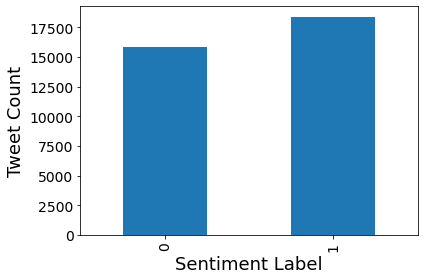

In [12]:
import matplotlib.pyplot as plt
under_df['label'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer(ngram_range=(2,2),min_df=5, max_df=0.9, stop_words='english')
vector.fit(under_df['clean_texts'])
vect_X = vector.fit_transform(under_df['clean_texts'])
vect_X.shape

(34159, 7417)

In [14]:
raw_df= pd.DataFrame(vect_X.toarray(),columns=vector.get_feature_names())

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(raw_df, under_df['label'], test_size=0.2, random_state=0)   

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# logistic regression model
model_lr = LogisticRegression()
# fit the model
model_lr.fit(X_train, y_train)
# predict the test set
y_pred = model_lr.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2%}".format(accuracy))
# print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# print the classification report
print(classification_report(y_test, y_pred))

Accuracy: 66.20%
[[1595 1567]
 [ 742 2928]]
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      3162
           1       0.65      0.80      0.72      3670

    accuracy                           0.66      6832
   macro avg       0.67      0.65      0.65      6832
weighted avg       0.67      0.66      0.65      6832



In [13]:
from sklearn.naive_bayes import MultinomialNB
#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.48      0.61      3113
           1       0.81      0.96      0.88      7387

    accuracy                           0.82     10500
   macro avg       0.83      0.72      0.75     10500
weighted avg       0.82      0.82      0.80     10500



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(X_train,y_train)
rm.oob_score_
y_pred =rm.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
roc_auc_score(y_test,y_pred)

In [12]:
# Save the Modle to file in the current working directory

Sentiment = "Pickle_Model.pkl"  

with open(Sentiment, 'wb') as file:  
    pickle.dump(model_lr, file)

In [ ]:
# Load the Model back from file
with open(Sentiment, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

In [ ]:
# Using the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickled_LR_Model.score(X_test, ytest)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickled_LR_Model.predict(X_test)  

Ypredict

In [4]:
#Loading pickle file
import pickle
with open('Model.pkl' , 'rb') as f:
    model_lr = pickle.load(f)

C:\Users\hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
x1 = ['Reports says that new vaccines are having great efficacy against new variants.']
x2 = ['Many people are dying due to lack of oxygen cylinders across country.']
x3 = ['New variants are dangerous. Everyone should follow precautionary measures.',
      'Covid curve will start flattening within 3 months.']

# Positive Sentiment

In [6]:
model_lr.predict(vector.transform(x1))

array([1], dtype=int64)

# Negative Sentiment

In [7]:
model_lr.predict(vector.transform(x2))

array([0], dtype=int64)

In [8]:
model_lr.predict(vector.transform(x3))

array([0, 0], dtype=int64)